# How to Use Variance Threshold Properly
## There is more to it than just choosing a threshold
<img src='images/pexels.jpg'></img>
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@billelmoula?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Billel Moula</a>
        on 
        <a href='https://www.pexels.com/photo/black-and-teal-mountain-540518/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a>
    </strong>
</figcaption>

### Setup

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

### Intro to Feature Selection

Today, it is common for datasets to have hundreds if not thousands of features. On the surface, this might seem like a good thing - more features give more information about each sample. But more often that not, these additional features don't provide that much value and introduce unnecessary complexity.

The biggest challenge of Machine Learning is to create models that have robust predictive power by using as few features as possible. But given the massive sizes of today's datasets, it is easy to lose the oversight of which features are important and which ones aren't. 

That's why, there is an entire skill to be learned in the ML field - **feature selection**. Feature selection is the process of choosing a subset of the most important features while trying to retain as much information as possible. 

As an example, let's say we have a dataset of body measurements such as weight, height, BMI, etc. Basic feature selection techniques should be able to drop BMI by finding out that BMI can be represented by weight and height.

In this article, we will explore one such feature selection technique called Variance Thresholding. This technique is a quick and light-weight way of eliminating features with very low variance, i. e. features with not much useful information.

### A Note on Variance

For those who are not familiar, *variance*, as the name suggests, shows the variability in a distribution in a single metric. It shows how spread out the distribution is and shows the average squared distance from the mean:

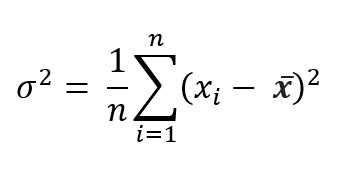

Obviously, distributions with bigger values yield a bigger variance because each difference is squared. But the main thing we care about in ML is that the distribution actually contains useful information. For example, consider this distribution:

In [2]:
dist_1 = [2, 2, 2, 2, 2, 2, 2, 2]

np.std(dist_1)

0.0

Computing the variance with Numpy shows us that the distribution has 0 variance or in other words completely useless. Using a feature with zero-variance only adds to model complexity not to its predictive power. Consider another one:

In [3]:
dist_2 = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6]

np.std(dist_2)

0.28747978728803447

Similarly, this one is almost made up of a single constant. Distributions that go around a single constant with a few exceptions are also useless. In other words, any feature or distribution with close to 0 variance should be dropped. 

### How to Use Scikit-learn's VarianceThreshold Estimator

Manually computing variances and thresholding them can be a lot of work. Fortunately, Scikit-learn provides `VarianceThreshold` estimator which can do all the work for us. Just pass a threshold cut-off and all features below that threshold will be dropped. 

To demonstrate `VarianceThreshold`, we will be working with Ansur dataset. This dataset records measurements of the human body in every imaginable way. Both male and female datasets contain 108 features or measurements of almost 6000 (4000 male, 2000 female) US Army Personnel. We will will be focusing on the male dataset:

In [4]:
ansur_male = pd.read_csv('data/ansur_male.csv', encoding='latin').drop('subjectid', axis=1)
ansur_male.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


First, let's get rid of the features with zero-variance. We will import `VarianceThreshold` from `sklearn.feature_selection`:

In [5]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold()

We initialize it just like any other Scikit-learn estimator. The default value for the threshold is always 0. Also, the estimator only works with numeric data obviously and it will raise an error if there are categorical features present in the dataframe. That's why, for now, we will subset the numeric features into another dataframe:

In [6]:
ansur_male_num = ansur_male.select_dtypes(include='number')
ansur_male_num.shape

(4082, 98)

So, we have got 98 numeric features. Let's now fit the estimator to the data and get its results:

In [7]:
transformed = vt.fit_transform(ansur_male_num)
transformed

array([[ 266, 1467,  337, ...,   41,   71,  180],
       [ 233, 1395,  326, ...,   35,   68,  160],
       [ 287, 1430,  341, ...,   42,   68,  205],
       ...,
       [ 264, 1394,  313, ...,   23,   67,  186],
       [ 203, 1417,  327, ...,   22,   69,  165],
       [ 327, 1523,  358, ...,   38,   73,  218]], dtype=int64)

Directly calling `fit_transform` will return the dataframe as a `numpy` array with features dropped. But sometimes, we don't want the result in that format because the column names will be removed. Consider the alternative:

In [8]:
_ = vt.fit(ansur_male_num)

mask = vt.get_support()

First, we fit the estimator to data and call its `get_support()` method. It returns a boolean mask with `True` values for columns which are not dropped. We can then use this mask to subset our DataFrame like so:

In [9]:
ansur_male_num = ansur_male_num.loc[:, mask]

Let's check the shape of the DataFrame to see if there were any constant columns:

In [10]:
ansur_male_num.shape

(4082, 98)

Nope, we still have the same number of features. Now, let's drop features with variances close to 0:

In [11]:
vt = VarianceThreshold(threshold=1)

# Fit
_ = vt.fit(ansur_male_num)
# Get the boolean mask
mask = vt.get_support()

ansur_reduced = ansur_male_num.loc[:, mask]
ansur_reduced.shape

(4082, 97)

With a `threshold` of 1, only 1 feature got dropped.

### Fairer Comparison of Variance With Feature Normalization

Often, it is not fair to compare the variance of a feature to another. The reason is that as the values in a distribution gets bigger, the variance grows exponentially. In other words, the variances will not be on the same scale. Consider this example:

<img src='images/1.png'></img>

The above features all have different medians, quartiles and ranges - completely different distributions. We cannot compare these features to each other. 

One method we can use is normalizing all features by dividing them by their mean:

In [12]:
normalized_df = ansur_male_num / ansur_male_num.mean()
normalized_df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
0,1.044567,1.018229,1.005237,0.967978,1.013481,1.003900,1.005300,0.964694,1.030336,0.994796,...,1.135066,0.997648,0.952949,0.994789,1.006476,0.111439,0.651868,1.359462,1.013768,0.957422
1,0.914978,0.968255,0.972425,0.959258,0.972852,0.972156,0.960509,0.947854,0.943776,0.933075,...,0.957067,0.997648,0.848885,0.949313,0.961639,0.111439,0.651868,1.160516,0.970932,0.851042
2,1.127033,0.992548,1.017168,1.002861,0.998433,1.015804,0.975439,1.027243,1.139233,0.947598,...,1.060254,0.985343,1.086245,1.023212,0.980518,0.222877,1.303737,1.392620,0.970932,1.090397
3,0.918905,0.934938,0.924698,1.002861,0.932222,1.039612,0.990370,0.964694,1.002413,0.951228,...,1.029298,0.916246,0.928395,1.000473,0.935681,0.111439,0.651868,1.027886,0.942376,0.930827
4,0.981736,1.100131,1.109638,1.076985,1.112046,1.059452,1.114788,1.046489,0.994037,0.954859,...,0.977704,1.178436,1.106123,1.068688,1.125648,0.222877,1.303737,0.696310,1.099438,1.132949


This method ensures that all varainces are on the same scale:

In [13]:
normalized_df.var()

abdominalextensiondepthsitting     0.021486
acromialheight                     0.001930
acromionradialelength              0.002720
anklecircumference                 0.004080
axillaheight                       0.002005
                                    ...    
SubjectNumericRace                85.577697
DODRace                            0.390651
Age                                0.085336
Heightin                           0.001771
Weightlbs                          0.025364
Length: 98, dtype: float64

Now, we can use the estimator with a lower threshold like 0.005 or 0.003:

In [14]:
vt = VarianceThreshold(threshold=.003)

# Fit
_ = vt.fit(normalized_df)
# Get the mask
mask = vt.get_support()
# Subset the DataFrame
ansur_final = ansur_male_num.loc[:, mask]
ansur_final.shape

(4082, 48)

As you can see, we were able to drop 50 features from the dataset. Now, let's test if we did the right thing by dropping so many features. 

We will check this by training two RandomForestRegressor to predict a person's weight in pounds: first one on the final, feature selected dataset and the second one on the full, numeric-feature only dataset.

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Build feature, target arrays
X, y = ansur_final.iloc[:, :-1], ansur_final.iloc[:, -1]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1121218)

# Init, fit, score
forest = RandomForestRegressor(random_state=1121218)

_ = forest.fit(X_train, y_train)

# Training Score
print(f"Training Score: {forest.score(X_train, y_train)}")
print(f"Test Score: {forest.score(X_test, y_test)}")

Training Score: 0.988528867222243
Test Score: 0.9511616691995844


Both training and test score suggest a really high performance without overfitting. Now, let's train the same model on the full numeric-only dataset:

In [23]:
# Build feature, target arrays
X, y = ansur_male_num.iloc[:, :-1], ansur_male_num.iloc[:, -1]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1121218)

# Init, fit, score
forest = RandomForestRegressor(random_state=1121218)

_ = forest.fit(X_train, y_train)

# Training Score
print(f"Training Score: {forest.score(X_train, y_train)}")
print(f"Test Score: {forest.score(X_test, y_test)}")

Training Score: 0.9886396641558658
Test Score: 0.9495977505935259


As you can see, even by dropping 50 features we were able to build a pretty powerful model. In fact, the first RandomForestRegressor is 1% better than the second.